## Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

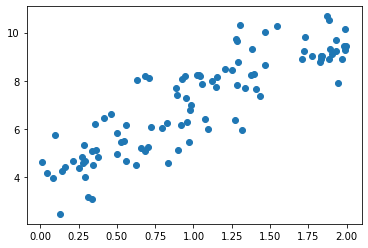

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.06234783],
       [2.94611282]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06234783],
       [9.95457347]])

(0.0, 2.0, 0.0, 15.0)

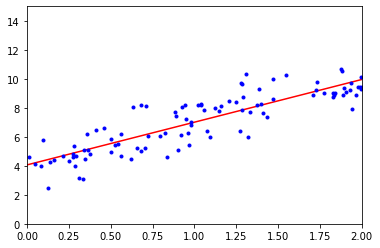

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.06234783]), array([[2.94611282]]))

In [10]:
lin_reg.predict(X_new)

array([[4.06234783],
       [9.95457347]])

## Gradient Descent

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [12]:
y.shape, y.ravel().shape

((100, 1), (100,))

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.07709383]), array([2.96712585]))

## Polynomial Regression

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

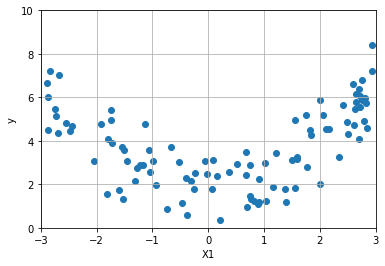

In [20]:
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.grid()

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.03759035]), array([-1.03759035,  1.07659374]))

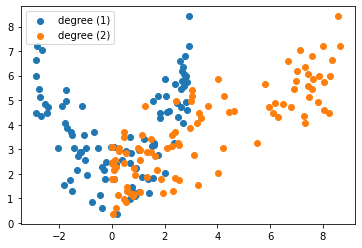

In [24]:
plt.scatter(X_poly[:, 0], y, label="degree (1)")
plt.scatter(X_poly[:, 1], y, label="degree (2)")
plt.legend()

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94700247]), array([[0.01309134, 0.50694253]]))

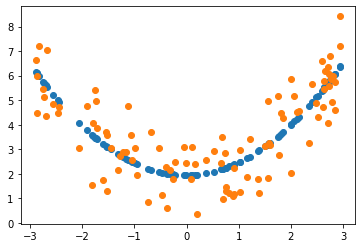

In [29]:
y_pred = lin_reg.predict(X_poly)
plt.scatter(X, y_pred)
plt.scatter(X, y)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.legend()

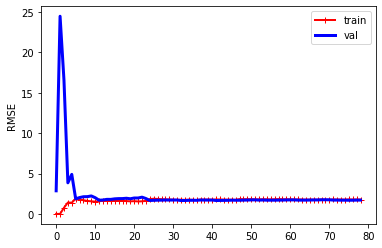

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

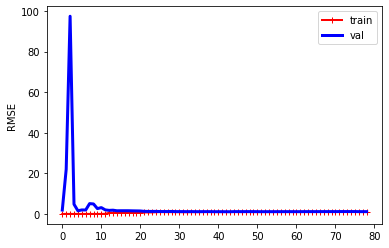

In [39]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)
plot_learning_curves(polynomial_regression, X, y)